<DIV ALIGN=CENTER>

# Introduction to Deep Learning
## Professor Robert J. Brunner
  
</DIV>  
-----
-----

## Introduction

Text

-----

-----
### Student Activity

In the preceding cells, we introduced Spark. Now that you have run the Notebook, go back and make the
following changes to see how the results change.

1. Change the `myRDD` example to start with all integers from 0 to 199.
Use an appropriate lambda function to convert this RDD to a new RDD that
has all odd integers from 1 to 399.

2. Filter the previous RDD to contain only entries that are divisible by
9.

3. Convert this RDD to a Spark DataFrame, specify the column name as
`Numbers`.

4. Add an index column to this Spark DataFrame, which sequentially
increases.

Additional, more advanced problems:

1. Create an RDD containing the 'Year', 'Month', 'DayofMonth', 'dDelay',
and 'Origin' columns for the airline data..

2. Filter this RDD to contain only flight data for flights leaving O'Hare
airport.

-----

Total number of samples = 1797


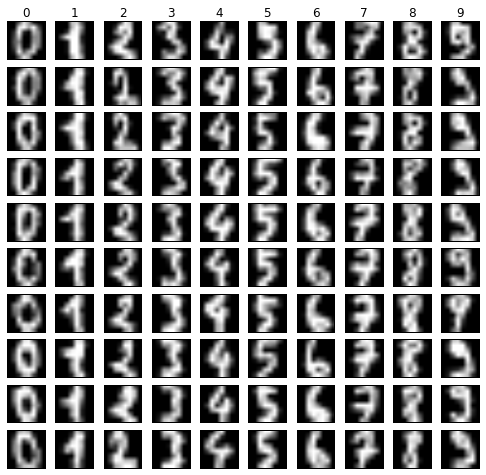

In [1]:
%matplotlib inline

# We have helper code to assist in the loading and plotting of these data
from helper_code import digits as hd

# We extract features (x), labels (y), and the images for plotting.
x, y, images = hd.get_data()
hd.im_plot(x, y, images)

print('Total number of samples = {0}'.format(y.shape[0]))

In [2]:
import sklearn.cross_validation as cv

(x_train, x_test, y_train, y_test) = cv.train_test_split(x, y, test_size=.25)

train_dim_one = x_train.shape[0]
train_dim_two = x_train.shape[1]

test_dim_one = x_test.shape[0]

print(x_train.shape)
print(train_dim_one)
print(train_dim_two)
print(test_dim_one)

(1347, 64)
1347
64
450


In [3]:
import numpy as np
np.random.seed(23)

from keras.utils import np_utils

batch_size = 128
nb_classes = 10
nb_epoch = 20

x_train = x_train.reshape(train_dim_one, train_dim_two)
x_test = x_test.reshape(test_dim_one, train_dim_two)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_trainc = np_utils.to_categorical(y_train, nb_classes)
y_testc = np_utils.to_categorical(y_test, nb_classes)

1347 train samples
450 test samples


In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(128, input_shape=(train_dim_two,)))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('tanh'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Using Theano backend.


____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_1 (Dense)                    (None, 128)         8320        dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 128)         0           dense_1[0][0]                    
____________________________________________________________________________________________________
dropout_1 (Dropout)                (None, 128)         0           activation_1[0][0]               
____________________________________________________________________________________________________
dense_2 (Dense)                    (None, 128)         16512       dropout_1[0][0]                  
___________________________________________________________________________________________

In [6]:
from keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_trainc,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(x_test, y_testc))



Train on 1347 samples, validate on 450 samples
Epoch 1/20
1347/1347 [==============================] - 0s - loss: 2.2901 - acc: 0.1581 - val_loss: 2.2691 - val_acc: 0.1133
Epoch 2/20
1347/1347 [==============================] - 0s - loss: 2.2491 - acc: 0.2413 - val_loss: 2.2346 - val_acc: 0.3000
Epoch 3/20
1347/1347 [==============================] - 0s - loss: 2.2070 - acc: 0.4284 - val_loss: 2.1880 - val_acc: 0.5378
Epoch 4/20
1347/1347 [==============================] - 0s - loss: 2.1548 - acc: 0.5820 - val_loss: 2.1306 - val_acc: 0.6044
Epoch 5/20
1347/1347 [==============================] - 0s - loss: 2.0853 - acc: 0.6422 - val_loss: 2.0561 - val_acc: 0.6333
Epoch 6/20
1347/1347 [==============================] - 0s - loss: 1.9968 - acc: 0.6711 - val_loss: 1.9592 - val_acc: 0.6556
Epoch 7/20
1347/1347 [==============================] - 0s - loss: 1.8890 - acc: 0.6912 - val_loss: 1.8490 - val_acc: 0.6600
Epoch 8/20
1347/1347 [==============================] - 0s - loss: 1.7570 - ac

In [8]:
score = model.evaluate(x_test, y_testc, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.531231688923
Test accuracy: 0.873333333333


In [9]:
print(score)

[0.53123168892330597, 0.87333333333333329]


In [10]:
pred = model.predict(x_test, verbose=10)

y_pred = np.argmax(pred, axis=1)

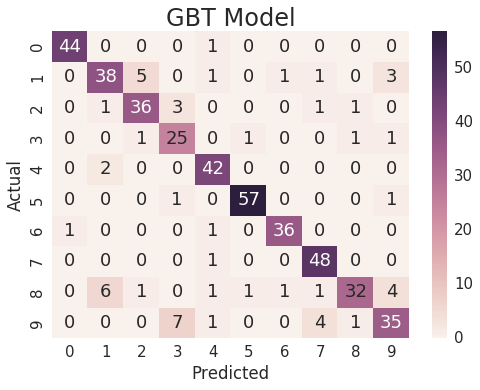

In [11]:
from helper_code import mlplots as mlp
nms = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

mlp.confusion(y_test, y_pred, nms, 10, 'GBT Model')


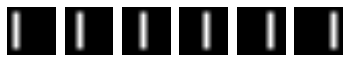

In [12]:
# Test on our ones

ones = hd.make_ones()

hd.plot_numbers(ones)

In [13]:
y_ones = np.empty(ones.shape[0], dtype=np.int8)

y_ones.fill(1)

y_onesc = np_utils.to_categorical(y_ones, nb_classes)

In [14]:
pred = model.predict(ones, verbose=10)

y_pred = np.argmax(pred, axis=1)

print(y_ones)

print(y_pred)

[1 1 1 1 1 1]
[0 0 1 1 9 0]


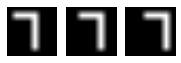

In [15]:
# Now test on our sevens

sevens = hd.make_sevens()
hd.plot_numbers(sevens)

In [16]:
y_sevens = np.empty(sevens.shape[0], dtype=np.int8)

y_sevens.fill(7)

y_sevensc = np_utils.to_categorical(y_sevens, nb_classes)

In [17]:
pred = model.predict(sevens, verbose=10)

y_pred = np.argmax(pred, axis=1)

print(y_sevens)

print(y_pred)

[7 7 7]
[1 9 0]


In [18]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

ImportError: No module named 'pydot'

In [ ]:
from keras.utils.visualize_util import plot
plot(model)